In [39]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [40]:
df_base = pd.read_excel("ActualDataFeb2020.xlsx")
df_kalman = pd.read_excel("Kalman_ActualDataFeb2020.xlsx")

In [41]:
pd.set_option('display.max_columns',50)

In [42]:
df_base.head()

,Дата - Время,Gpp,Tpp,Gp4,Go4,Tp4,T04,Gp5,Go5,Tp5,To5,Gp2,Go2,Tp2,To2,Gpp2,Gpb4,Gpp7,To7,Tp11,To11,Go11,Gp14,Go14,To14,GpSN4,GoSN4,TpSN4,ToSn4,GpSN5,GoSN5,TpSN5,ToSN5,GoSN2,ToSN2
0,12.02.2020 - 00:00:00,309.94,107.65,1922,2042,109.35,63.53,1172,779,112.04,63.86,955.04,846.48,103.95,64.47,111,2288.07,276,66.07,97.04,66.06,1259,1172,1465.10,80.48,276.85,151.91,99.15,83.48,219.48,293.34,111.62,88,66.78,82
1,12.02.2020 - 00:10:00,315.52,107.42,1920,2042,109.47,63.55,1172,777,111.99,63.89,951.14,831.38,104.13,64.55,138,2273.90,276,66.08,97.07,66.10,1264,1173,1467.80,80.49,276.70,151.86,99.17,83.49,219.41,292.78,111.64,88,47.67,82
2,12.02.2020 - 00:20:00,308.43,107.32,1922,2044,109.50,63.59,1181,788,112.02,63.93,955.17,842.67,104.36,64.58,92,2288.81,276,66.09,97.06,66.11,1264,1175,1467.79,80.45,276.35,151.41,99.22,83.50,219.10,290.53,111.59,88,38.99,82
3,12.02.2020 - 00:30:00,320.57,107.29,1912,2039,109.39,63.61,1174,775,111.87,63.94,939.94,842.03,103.95,64.52,113,2278.24,275,66.09,97.12,66.14,1264,1173,1463.50,80.58,276.49,152.67,98.99,83.15,220.24,290.94,111.57,88,39.03,82
4,12.02.2020 - 00:40:00,320.70,107.32,1915,2043,109.37,63.62,1173,762,112.00,63.95,944.52,852.73,103.61,64.60,91,2303.72,276,66.11,97.11,66.13,1269,1170,1465.47,80.79,276.69,152.60,98.91,83.29,220.06,292.38,111.54,88,47.67,82


In [43]:
df_base["GpSN5"].mean()

223.61628537735848

In [44]:
ur_1_base = df_base['Gp2'] - df_base['Go2'] - df_base['GoSN2']
ur_1_kalman = df_kalman['Gp2'] - df_kalman['Go2'] - df_kalman['GoSN2']

ur_2_base = df_base['Go11'] - df_base['Go4'] - df_base['GoSN4'] + df_base['Go2']
ur_2_kalman = df_kalman['Go11'] - df_kalman['Go4'] - df_kalman['GoSN4'] + df_kalman['Go2']

ur_3_base = df_base['Go11']*df_base['To11']-df_base['Go4']*df_base['T04']-df_base['GoSN4']*df_base['ToSn4']+df_base['Go2']*df_base['To2']
ur_3_kalman = df_kalman['Go11']*df_kalman['To11']-df_kalman['Go4']*df_kalman['T04']-df_kalman['GoSN4']*df_kalman['ToSn4']+df_kalman['Go2']*df_kalman['To2']

ur_4_base = df_base['Gpb4']-df_base['Gp2']-df_base['Go11']
ur_4_kalman = df_kalman['Gpb4']-df_kalman['Gp2']-df_kalman['Go11']

ur_5_base = df_base['Gp4']-df_base['Gpb4']+df_base['GpSN4']
ur_5_kalman = df_kalman['Gp4']-df_kalman['Gpb4']+df_kalman['GpSN4']

ur_6_base = df_base['Go14']-df_base['Gpp']-df_base['Go5']-df_base['GoSN5']
ur_6_kalman = df_kalman['Go14']-df_kalman['Gpp']-df_kalman['Go5']-df_kalman['GoSN5']

ur_7_base = df_base['Go14']*df_base['To14']-df_base['Gpp']*df_base['Tpp']-df_base['Go5']*df_base['To5']-df_base['GoSN5']*df_base['ToSN5']
ur_7_kalman = df_kalman['Go14']*df_kalman['To14']-df_kalman['Gpp']*df_kalman['Tpp']-df_kalman['Go5']*df_kalman['To5']-df_kalman['GoSN5']*df_kalman['ToSN5']

ur_8_base = df_base['Gp5']-df_base['Go14']+df_base['GoSN5']
ur_8_kalman = df_kalman['Gp5']-df_kalman['Go14']+df_kalman['GoSN5']

In [45]:
ur1_name = "Gp2 = Go2+GoSN2"
ur2_name ="Go11 = Go4 + GoSN4 - Go2"
ur3_name ="To11 = (Go4*To4 + GoSN4*ToSN4 - Go2*To2)/Go11"
ur4_name ="Gpb4 = Gp2 + Go11)"
ur5_name ="Gp4 = Gpb4 - GpSN4)"
ur6_name ="Go14 = Gpp + Go5 + GoSN5"
ur7_name ="To14 = (Gpp*Tpp + Go5*To5 + GoSN5*ToSN5)/Go14"
ur8_name ="Gp5 = Go14 - GpSN5"

In [46]:
plt.rc('figure',figsize=(20,5))

Gp2 = Go2+GoSN2
Оранжевая линия - линия нуля (зависимость невязки уравнения по времени)
Средние значения выражений в уравнении 
 Gp2 985.8321933962263 
 Go2 860.5947995283018 
 GoSN2 68.37080188679245


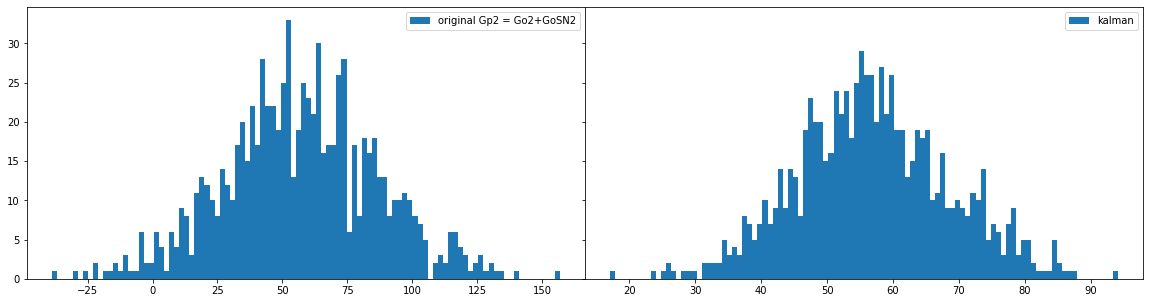

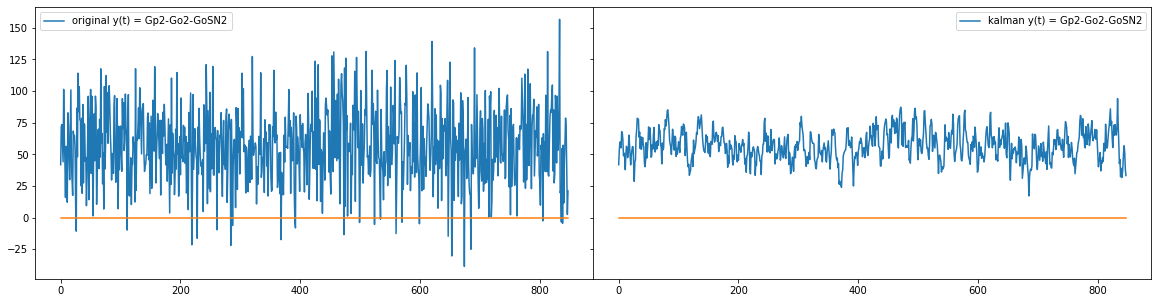

In [56]:
time_col=range(len(df_base["Дата - Время"]))

print(ur1_name)
print("Оранжевая линия - линия нуля (зависимость невязки уравнения по времени)")
print(f"Средние значения выражений в уравнении \n Gp2 {df_base['Gp2'].mean()} \n Go2 {df_base['Go2'].mean()} \n GoSN2 {df_base['GoSN2'].mean()}")

fig,axes = plt.subplots(1,2,sharey=True)
axes[0].hist(ur_1_base,bins=100, label = "original Gp2 = Go2+GoSN2")
axes[0].legend()
axes[1].hist(ur_1_kalman,bins=100, label = "kalman")
axes[1].legend()
plt.subplots_adjust(wspace=0)


fig1,axes1 = plt.subplots(1,2,sharey=True)
axes1[0].plot(time_col,ur_1_base, label = "original y(t) = Gp2-Go2-GoSN2")
axes1[0].legend()
axes1[0].plot(time_col,[0 for i in time_col])
axes1[1].plot(time_col,ur_1_kalman, label = "kalman y(t) = Gp2-Go2-GoSN2")
axes1[1].legend()
axes1[1].plot(time_col,[0 for i in time_col])
plt.subplots_adjust(wspace=0)


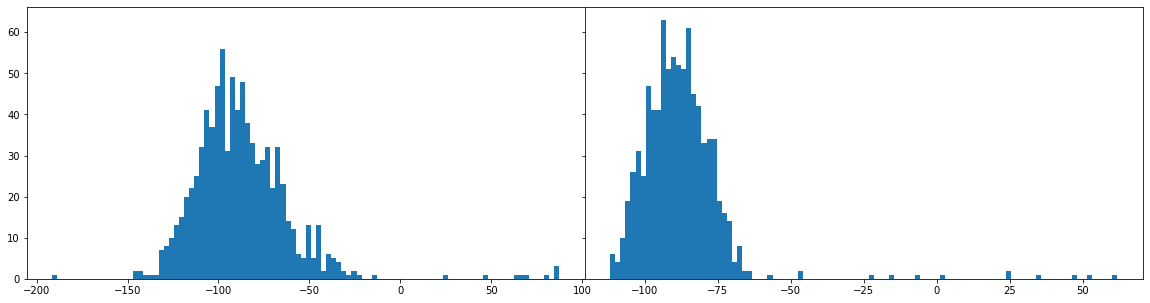

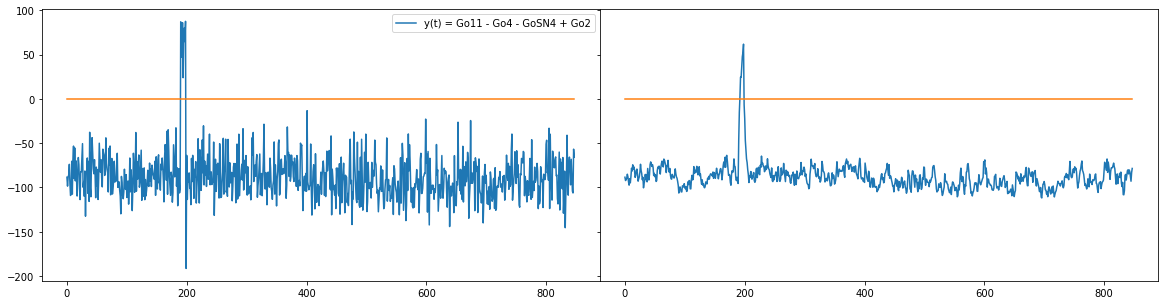

In [57]:
fig,axes = plt.subplots(1,2,sharey=True)
axes[0].hist(ur_2_base,bins=100)
axes[1].hist(ur_2_kalman,bins=100)
plt.subplots_adjust(wspace=0)

fig1,axes1 = plt.subplots(1,2,sharey=True)
axes1[0].plot(time_col,ur_2_base, label="y(t) = Go11 - Go4 - GoSN4 + Go2")
axes1[0].legend()
axes1[0].plot(time_col,[0 for i in time_col])
axes1[1].plot(time_col,ur_2_kalman)
axes1[1].plot(time_col,[0 for i in time_col])

plt.subplots_adjust(wspace=0)

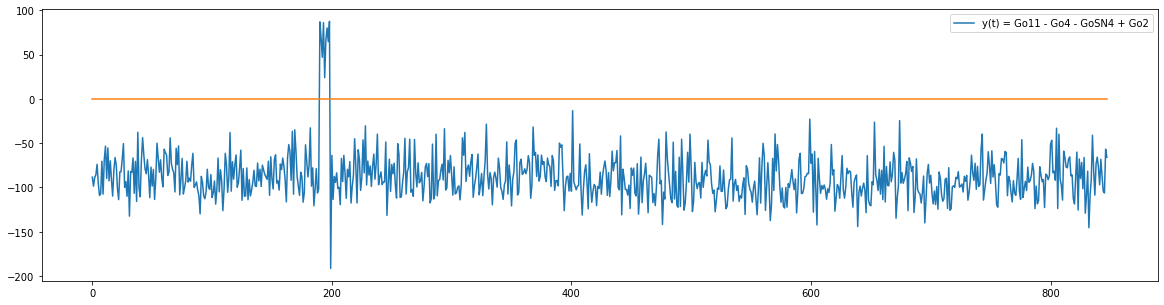

In [49]:
fig1,axes1 = plt.subplots(1,1)
axes1.plot(time_col,ur_2_base, label="y(t) = Go11 - Go4 - GoSN4 + Go2")
axes1.plot(time_col,[0 for i in time_col])
plt.legend()

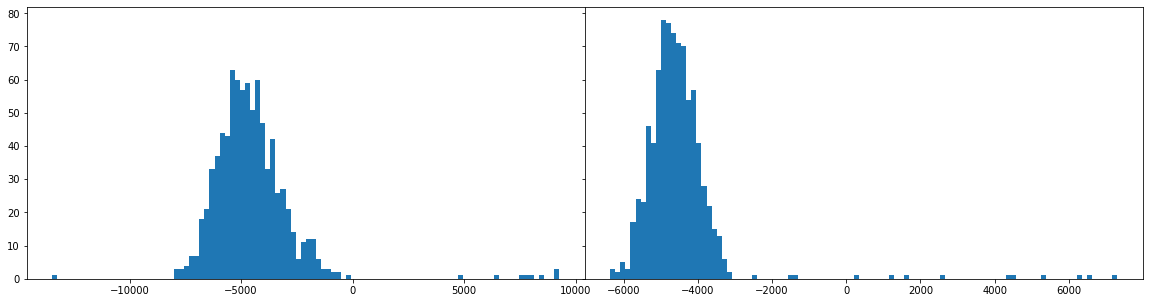

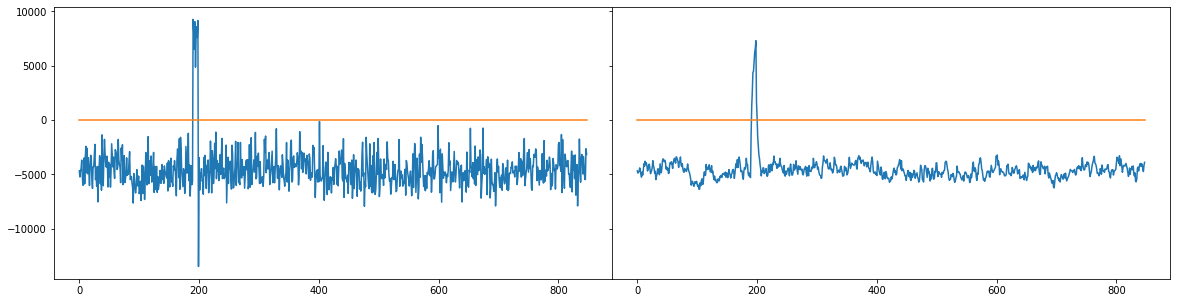

In [50]:
fig,axes = plt.subplots(1,2,sharey=True)
axes[0].hist(ur_3_base,bins=100)
axes[1].hist(ur_3_kalman,bins=100)
plt.subplots_adjust(wspace=0)

fig1,axes1 = plt.subplots(1,2,sharey=True)
axes1[0].plot(time_col,ur_3_base)
axes1[0].plot(time_col,[0 for i in time_col])
axes1[1].plot(time_col,ur_3_kalman)
axes1[1].plot(time_col,[0 for i in time_col])
plt.subplots_adjust(wspace=0)

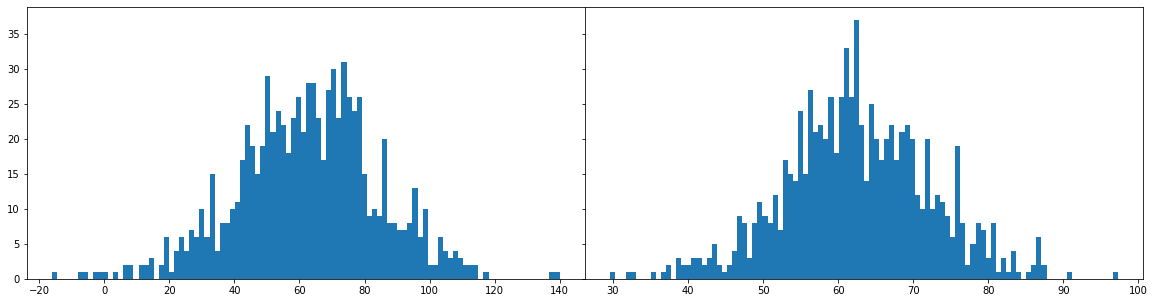

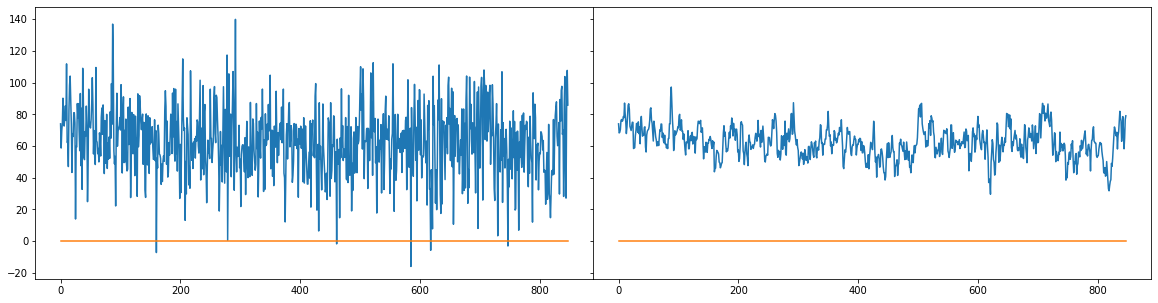

In [51]:
fig,axes = plt.subplots(1,2,sharey=True)
axes[0].hist(ur_4_base,bins=100)
axes[1].hist(ur_4_kalman,bins=100)
plt.subplots_adjust(wspace=0)

fig1,axes1 = plt.subplots(1,2,sharey=True)
axes1[0].plot(time_col,ur_4_base)
axes1[0].plot(time_col,[0 for i in time_col])
axes1[1].plot(time_col,ur_4_kalman)
axes1[1].plot(time_col,[0 for i in time_col])
plt.subplots_adjust(wspace=0)

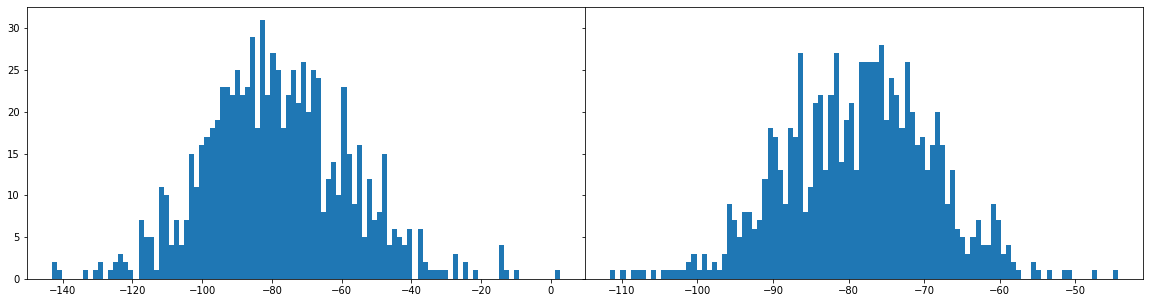

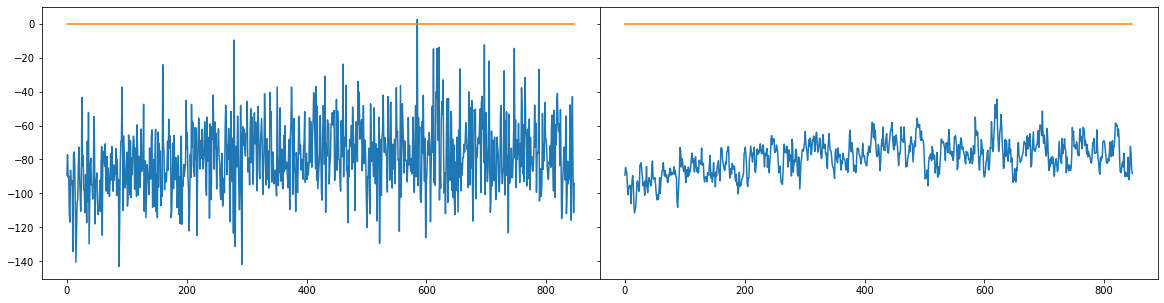

In [52]:
fig,axes = plt.subplots(1,2,sharey=True)
axes[0].hist(ur_5_base,bins=100)
axes[1].hist(ur_5_kalman,bins=100)
plt.subplots_adjust(wspace=0)

fig1,axes1 = plt.subplots(1,2,sharey=True)
axes1[0].plot(time_col,ur_5_base)
axes1[0].plot(time_col,[0 for i in time_col])
axes1[1].plot(time_col,ur_5_kalman)
axes1[1].plot(time_col,[0 for i in time_col])
plt.subplots_adjust(wspace=0)

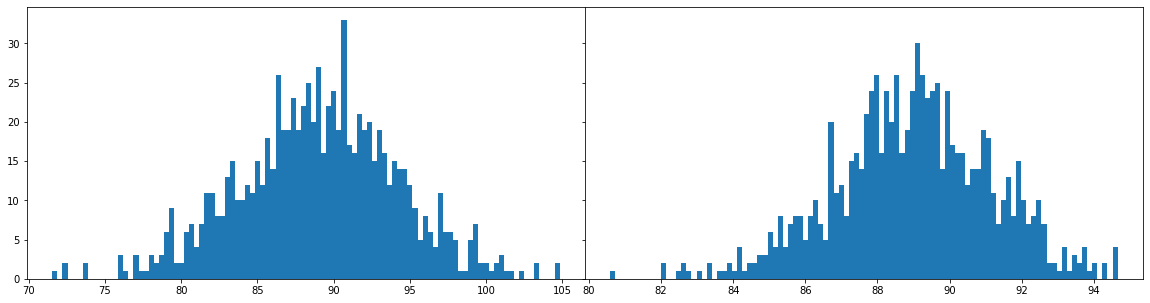

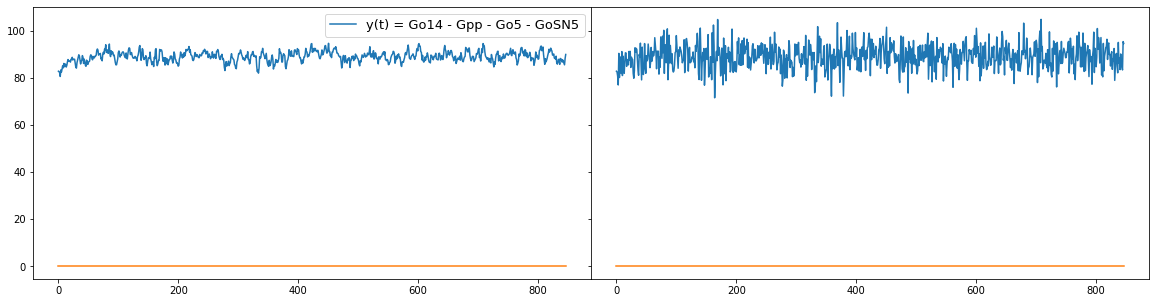

In [76]:
fig,axes = plt.subplots(1,2,sharey=True)
axes[0].hist(ur_6_base,bins=100)
axes[1].hist(ur_6_kalman,bins=100)
plt.subplots_adjust(wspace=0)

fig1,axes1 = plt.subplots(1,2,sharey=True)
axes1[1].plot(time_col,ur_6_base)
axes1[1].plot(time_col,[0 for i in time_col])
axes1[0].plot(time_col,ur_6_kalman, label="y(t) = Go14 - Gpp - Go5 - GoSN5")
axes1[0].plot(time_col,[0 for i in time_col])
axes1[0].legend(fontsize=13)
plt.subplots_adjust(wspace=0)

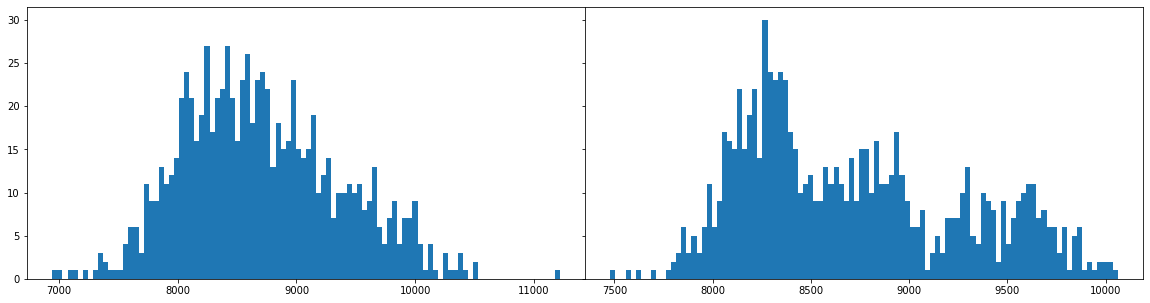

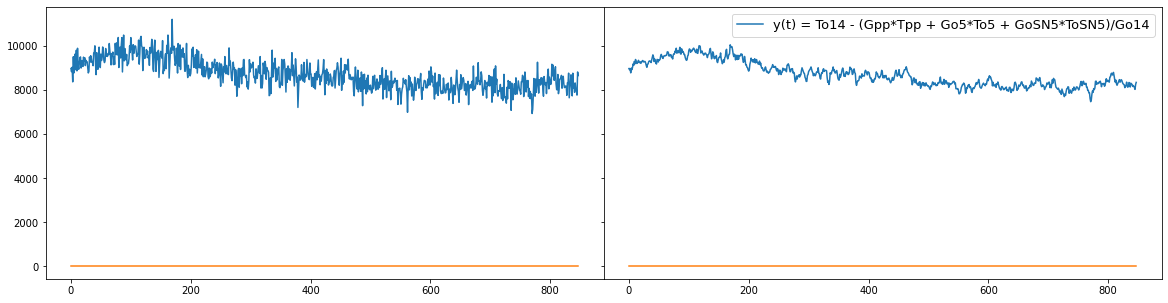

In [71]:
fig,axes = plt.subplots(1,2,sharey=True)
axes[0].hist(ur_7_base,bins=100)
axes[1].hist(ur_7_kalman,bins=100)
plt.subplots_adjust(wspace=0)

fig1,axes1 = plt.subplots(1,2,sharey=True)
axes1[0].plot(time_col,ur_7_base)
axes1[0].plot(time_col,[0 for i in time_col])
axes1[1].plot(time_col,ur_7_kalman, label = "y(t) = To14 - (Gpp*Tpp + Go5*To5 + GoSN5*ToSN5)/Go14")
axes1[1].plot(time_col,[0 for i in time_col])
axes1[1].legend(fontsize=13)
plt.subplots_adjust(wspace=0)

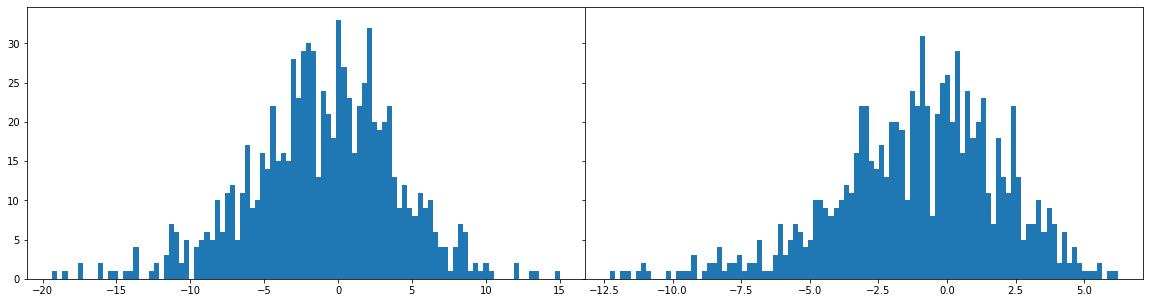

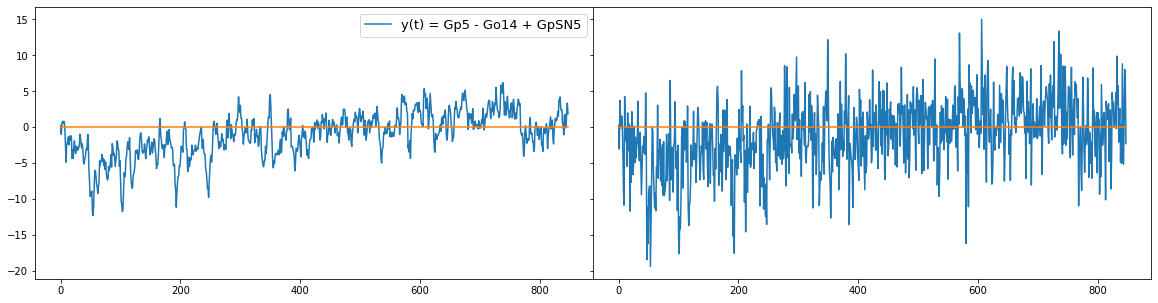

In [75]:
fig,axes = plt.subplots(1,2,sharey=True)
axes[0].hist(ur_8_base,bins=100)
axes[1].hist(ur_8_kalman,bins=100)
plt.subplots_adjust(wspace=0)

fig1,axes1 = plt.subplots(1,2,sharey=True)
axes1[1].plot(time_col,ur_8_base)
axes1[1].plot(time_col,[0 for i in time_col])
axes1[0].plot(time_col,ur_8_kalman, label = "y(t) = Gp5 - Go14 + GpSN5")
axes1[0].plot(time_col,[0 for i in time_col])
axes1[0].legend(fontsize=13)
plt.subplots_adjust(wspace=0)